In [328]:
import pandas as pd
import numpy as np
# Cargar desde CSV
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')


In [330]:
df_train

,unit_number,time,opSet1,opSet2,opSet3,senMes1,senMes2,senMes3,senMes4,senMes5,...,senMes15,senMes16,senMes17,senMes18,senMes19,senMes20,senMes21,FM,conditions,dataSet
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,1,1,FD001
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,1,1,FD001
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,1,1,FD001
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,1,1,FD001
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,1,1,FD001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160354,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,8.4541,0.03,372,2319,100.0,29.11,17.5234,2,6,FD004
160355,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,8.2221,0.03,396,2388,100.0,39.38,23.7151,2,6,FD004
160356,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,8.2525,0.03,395,2388,100.0,39.78,23.8270,2,6,FD004
160357,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,9.0515,0.02,337,2223,100.0,15.26,9.0774,2,6,FD004


<h1>Analisis exploratorio de datos por condición de experimento </h1>


1. Analisis de ciclos maximos realizados por motor por experimento

In [334]:
import matplotlib.pyplot as plt
import seaborn as sns

dataSets = ['FD001', 'FD002', 'FD003', 'FD004'] # 4 tipos de experimento
maxCycles = []

#Iteración entre los 4 experimentos
for datSetName in dataSets:

    #Inicialización de variables
    df_experiment = pd.DataFrame()
    max_time = [] #Array con el numero 

    #Extracción del data set por experimento
    df_experiment = df_test[df_test['dataSet'] == datSetName]

    #Extracción de array de maximos ciclos por motor. 
    for unit_number in df_experiment['unit_number'].unique():
        df_max_cycles = df_test[df_test['unit_number'] == unit_number]
        mx_time = df_max_cycles['time'].max()
        max_time.append(mx_time)

    #Variable global array 2D para guardar los ciclos maximos por experimento
    maxCycles.append(max_time)


1.1 Muestra visual del analisis de ciclos maximos por motor

Promedio de cilos experimento FD004: 235.77
Valor maximo experimento FD004: 486
Valor minimo  experimento FD004:  121


C:\Users\Verdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


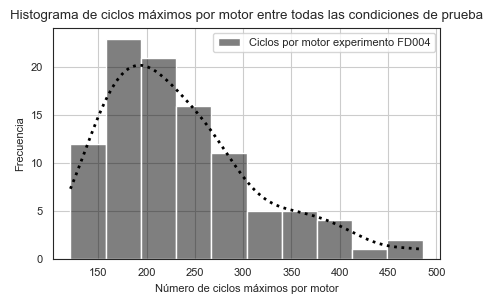

Promedio de cilos experimento FD004: 201.5984555984556
Valor maximo experimento FD004: 486
Valor minimo  experimento FD004:  36


C:\Users\Verdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


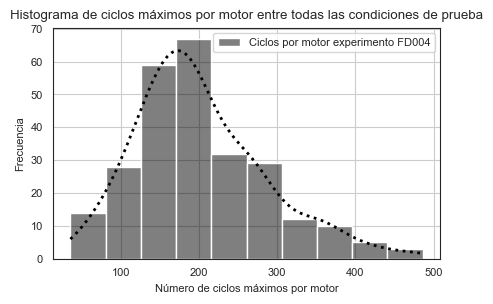

Promedio de cilos experimento FD004: 235.77
Valor maximo experimento FD004: 486
Valor minimo  experimento FD004:  121


C:\Users\Verdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


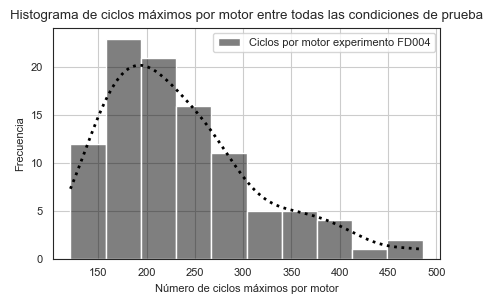

Promedio de cilos experimento FD004: 204.56451612903226
Valor maximo experimento FD004: 486
Valor minimo  experimento FD004:  41


C:\Users\Verdi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


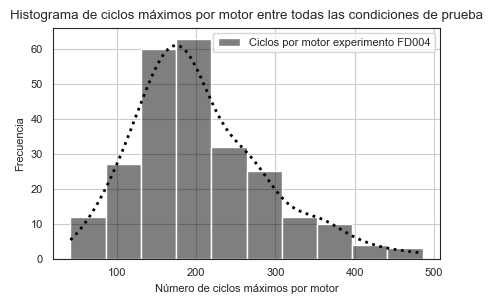

In [337]:

for max_time in maxCycles:
   # Variables descriptivas
    mean_max_time = np.mean(max_time) #Promedio de ciclos completados por un motor
    max_value = np.max(max_time) #Ciclos maximos completaods por un motor
    min_value = np.min(max_time) #Ciclos minimos completaods por un motor
    
    print(f"Promedio de cilos experimento {datSetName}:", mean_max_time)
    print(f"Valor maximo experimento {datSetName}:", max_value)
    print(f"Valor minimo  experimento {datSetName}: ", min_value)
    
    #Presentación del histograma. 
    sns.set_style("white")
    plt.figure(figsize=(5, 3))  
    label = str('Ciclos por motor experimento ') + datSetName
    sns.histplot(max_time, bins=10, kde=True, color='k', label= label, alpha=0.5, 
                line_kws={'color': 'orange', 'lw': 2, 'ls': ':'})
    plt.xlabel('Número de ciclos máximos por motor')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de ciclos máximos por motor entre todas las condiciones de prueba')
    plt.legend()
    plt.grid()  
    name = label + ".png"
    plt.savefig(name, dpi=300, bbox_inches='tight')
    plt.show()

2 Muestra visual del analisis de ciclos maximos por motor box plots

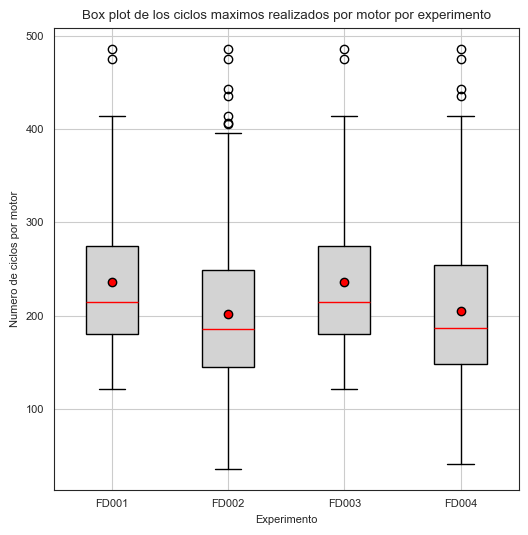

In [338]:
plt.figure(figsize=(6, 6))

plt.boxplot(maxCycles, patch_artist=True,
            boxprops=dict(facecolor='lightgrey', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'),
            meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black'),
            showmeans=True)


# Personalizar el gráfico
plt.title("Box plot de los ciclos maximos realizados por motor por experimento")
plt.xlabel("Experimento")
plt.ylabel("Numero de ciclos por motor")
plt.xticks([1, 2, 3, 4], ['FD001', 'FD002', 'FD003', 'FD004'])
plt.grid(True)

# Guardar el gráfico
plt.savefig('box_plots_por_experimento.png', dpi=300)
plt.show()

3. Mapa de corelacion entre los datos 

C:\Users\Verdi\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


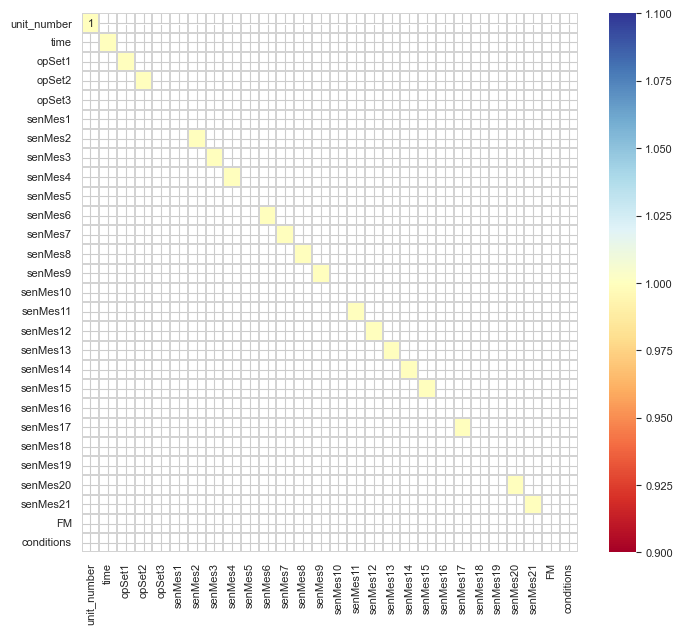

C:\Users\Verdi\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


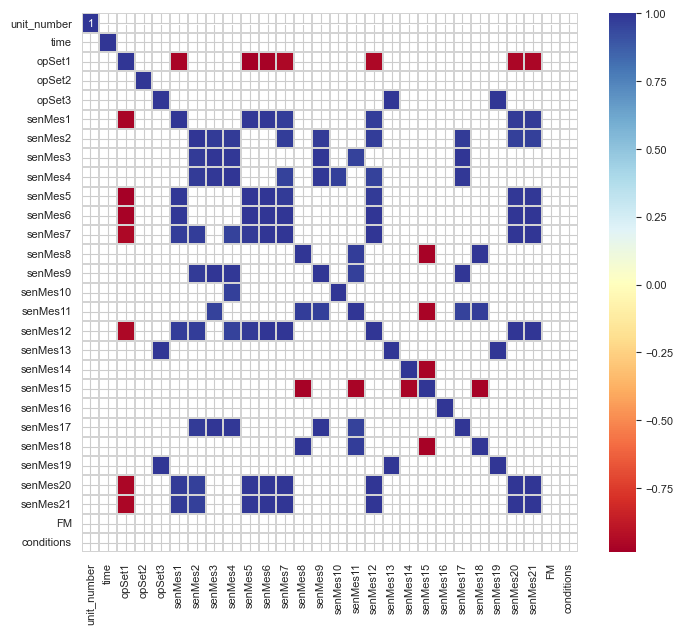

C:\Users\Verdi\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


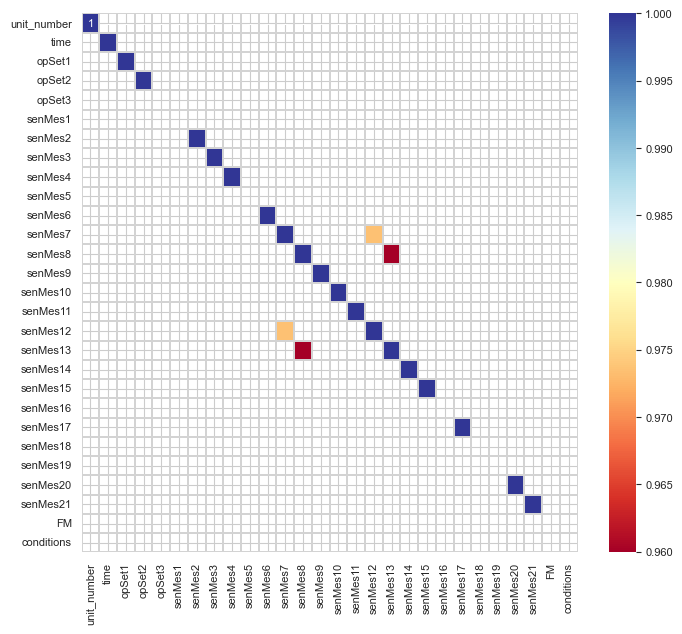

C:\Users\Verdi\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


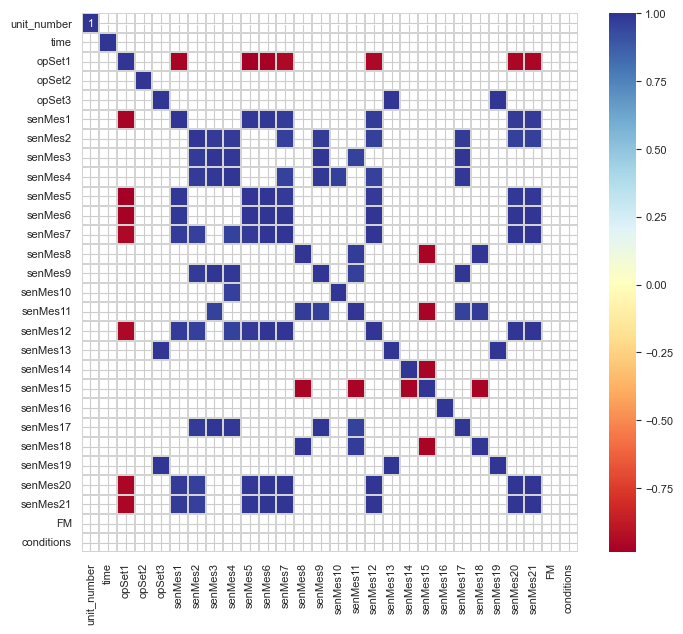

In [347]:
dataSets = ['FD001', 'FD002', 'FD003', 'FD004'] # 4 tipos de experimento

#Iteración entre los 4 experimentos
for datSetName in dataSets:
 
    df_experiment = df_test[df_test['dataSet'] == datSetName].drop(columns='dataSet')
    df_correlations = df_experiment.corr() #Matriz de corelación del experimento
    
    threshold = 0.95 #Valores de corelación mayores a 0.9 son ploteados
    
    mask = df_correlations.where( (abs(df_correlations) >= threshold)).isna() #el mask solo plotea los valores que cumplen el threshold
    
    #Settings de la figura
    sns.set_style("whitegrid", {"axes.facecolor": ".0"})
    plt.figure(figsize=(8,7))
    plot_kws={"s": 1}
    
    #Heat nao de correación -1 y 1 son correlaciones fuertes. 
    sns.heatmap(df_correlations,
                cmap='RdYlBu',
                annot=True,
                mask=mask,
                linewidths=0.2, 
                linecolor='lightgrey').set_facecolor('white') 
    name =  'Mapa_de_correlacion_' + datSetName + '.png'
    plt.savefig(name, dpi=300)
    plt.show()

4. Apartir de los mapas de correlacion, podemos explorar la correlacion entre medidas de los sensores y las codiciones de operacion opSet 1,2,3